# Assignment for Week 8 MLDS
by Eva Aßmann, Paul Vogler

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_classification, make_moons, load_iris
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import minmax_scale, StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib as mpl
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from pandas import DataFrame
from scipy.spatial import voronoi_plot_2d, Voronoi
from scipy.cluster.hierarchy import dendrogram
from itertools import cycle, islice
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generate Data

## Non-Cluster Data

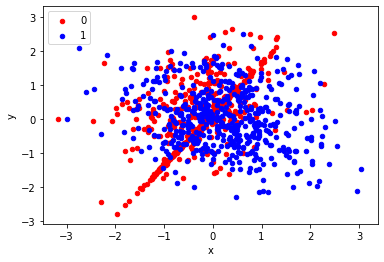

In [2]:
X1,labels_true1 = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=0.3,flip_y=0,weights=[0.5,0.5], random_state=2)
# scatter plot, dots colored by class value
df_no_cluster = DataFrame(dict(x=X1[:,0], y=X1[:,1], label=labels_true1))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df_no_cluster.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=[colors[key]])
#pyplot.savefig('non-cluster.png')
pyplot.show()

## Non-Spherical Data

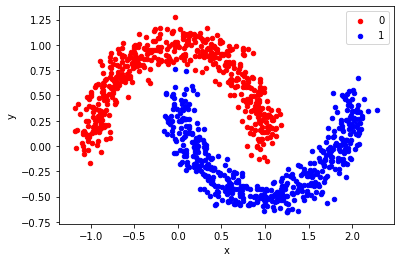

In [3]:
# generate 2d classification dataset
X2, labels_true2 = make_moons(n_samples=1000, noise=0.1)
# scatter plot, dots colored by class value
df_moon = DataFrame(dict(x=X2[:,0], y=X2[:,1], label=labels_true2))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df_moon.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=[colors[key]])
#pyplot.savefig('non-spherical.png')
pyplot.show()

## Many Clusters close to each other

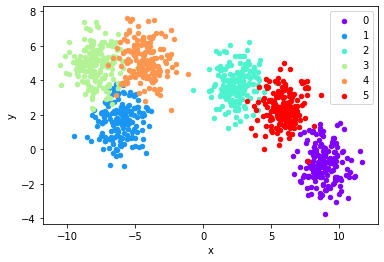

In [4]:
# generate 2d classification dataset
centers = 6
X3, labels_true3 = make_blobs(n_samples=1000, centers=centers, n_features=2, random_state=37)
# scatter plot, dots colored by class value
df_clusters = DataFrame(dict(x=X3[:,0], y=X3[:,1], label=labels_true3))
fig, ax = pyplot.subplots()
grouped = df_clusters.groupby('label')
colors = cm.rainbow(np.linspace(0, 1, centers))
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=[colors[key]])
#pyplot.savefig('many-clusters.png')
pyplot.show()

## Different Cluster Sizes

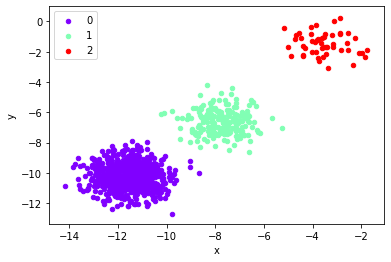

In [5]:
X_1, _ = make_blobs(n_samples=750, n_features=2, centers=1, center_box=(-12,-10), cluster_std=.8, random_state=5)
X_2, _ = make_blobs(n_samples=200, n_features=2, centers=1, center_box=(-8,-6), cluster_std=.8, random_state=12)
X_3, _ = make_blobs(n_samples=50, n_features=2, centers=1, center_box=(-4,0), cluster_std=.8, random_state=43)
X4 = np.concatenate((X_1, X_2, X_3), axis=0)
labels_true4 = [0]*750 + [1]*200 + [2]*50
# scatter plot, dots colored by class value
df_sizes = DataFrame(dict(x=X4[:,0], y=X4[:,1], label=labels_true4))
fig, ax = pyplot.subplots()
grouped = df_sizes.groupby('label')
colors = cm.rainbow(np.linspace(0, 1, 3))
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=[colors[key]])
#pyplot.savefig('diff-sizes.png')
pyplot.show()

## Different Cluster Densities

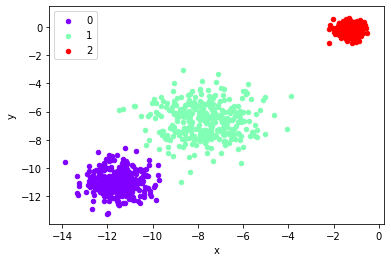

In [6]:
X_1, _ = make_blobs(n_samples=333, n_features=2, centers=1, center_box=(-12,-10), cluster_std=.8, random_state=16)
X_2, _ = make_blobs(n_samples=333, n_features=2, centers=1, center_box=(-8,-6), cluster_std=1.2, random_state=12)
X_3, _ = make_blobs(n_samples=334, n_features=2, centers=1, center_box=(-4,0), cluster_std=.3, random_state=87)
X5 = np.concatenate((X_1, X_2, X_3), axis=0)
labels_true5 = [0]*333 + [1]*333 + [2]*334
# scatter plot, dots colored by class value
df_densities = DataFrame(dict(x=X5[:,0], y=X5[:,1], label=labels_true5))
fig, ax = pyplot.subplots()
grouped = df_densities.groupby('label')
colors = cm.rainbow(np.linspace(0, 1, 3))
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=[colors[key]])
#pyplot.savefig('diff-densi.png')
pyplot.show()

## 3 clusters making k-means (k=3) fail

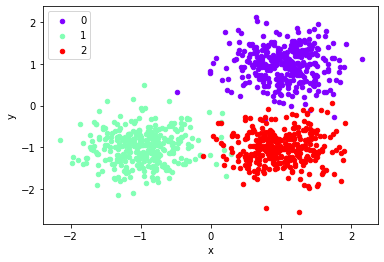

In [7]:
centers = [[1, 1], [-1, -1], [1, -1]]
X6, labels_true6= make_blobs(n_samples=1000, centers=centers, cluster_std=0.4)
df_rescale = DataFrame(dict(x=X6[:,0], y=X6[:,1], label=labels_true6))
fig, ax = pyplot.subplots()
grouped = df_rescale.groupby('label')
colors = cm.rainbow(np.linspace(0, 1, 3))
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=[colors[key]])
#pyplot.savefig('kmeans-fail.png')
pyplot.show()

In [8]:
min(X6[:,1]), max(X6[:,1])

(-2.540556254432765, 2.1248726775182583)

__... with one rescaled dimension__

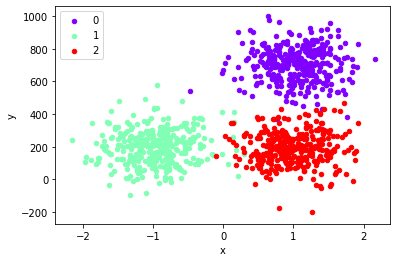

In [9]:
# rescaling 2nd dimension (y coordinated)
X6[:,1]= minmax_scale(X6[:,1], (-200, 1000), axis=0)
df_rescaled = DataFrame(dict(x=X6[:,0], y=X6[:,1], label=labels_true6))
fig, ax = pyplot.subplots()
grouped = df_rescaled.groupby('label')
colors = cm.rainbow(np.linspace(0, 1, 3))
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=[colors[key]])
#pyplot.savefig('kmeans-fail-rescaled.png')
pyplot.show()

In [10]:
min(X6[:,1]), max(X6[:,1])

(-200.0, 1000.0)

__Apply k-means clustering with k=3 clusters__

In [0]:
def plot_boundaries(X, n_clusters, df):
  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(X)
  y_kmeans = kmeans.predict(X)
  # Step size of the mesh. Decrease to increase the quality of the VQ.
  h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Obtain labels for each point in mesh. Use last trained model.
  Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.figure(1)
  plt.clf()
  plt.imshow(Z, interpolation='nearest',
         extent=(xx.min(), xx.max(), yy.min(), yy.max()),
         cmap=plt.cm.Paired,
         aspect='auto', origin='lower')

  # colors = cm.rainbow(np.linspace(0, 1, 10))
  markers = ['ko', 'g*', 'cx', 'r.', 'yv', 'bd', 'm^']
  grouped = df.groupby('label')
  for key, group in grouped:
      # group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=[colors[key]])
      plt.plot(group["x"], group["y"], markers[key], markersize=2, label=key)
  # Plot the centroids as a white X
  centroids = kmeans.cluster_centers_
  plt.scatter(centroids[:, 0], centroids[:, 1],
          marker='x', s=169, linewidths=3,
          color='w', zorder=10)
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.xticks(())
  plt.yticks(())
  plt.legend()
  plt.show()


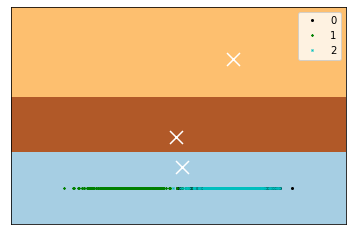

In [12]:
plot_boundaries(X6, 3, df_rescale)

# Density-based clustering

## Determine best values for eps and min_samples
- assign each data point its k-nearest neighbor
- sort points according to descending k-dist
- plot sorted k-dist graph

Look at density distribution: for points p, set eps to k-dist(p) and min_samples to k. Then, all points positioned left in the plot will be noise and all points right from p will be core points

Find threshold point with the maximal k-dist value in the 'thinnest' cluster in order to determine the best parameter values for eps and min_samples. The threshold point is the first point in the first "valley" of the sorted k-dist graph

In [0]:
def k_dist(inputdata, k):
  # get k nearest neighbors for every point in a data set
  nn = NearestNeighbors(k).fit(inputdata)
  # the query point is not considered its own neighbor when running kneighbors without X
  tmp = nn.kneighbors()
  distances = tmp[0]
  max_k_dist = np.array([round(max(elem),k) for elem in distances])
  max_k_dist = np.sort(max_k_dist)[::-1]
  plt.plot(max_k_dist)
  plt.xlabel('points', fontsize=14)
  plt.ylabel(str(k)+'-dist', fontsize=14)
  plt.show()
  return None

In [0]:
data_dict = {'non-cluster':[X1, labels_true1],'non-spherical':[X2, labels_true2],'many-clusters':[X3, labels_true3],
             'diff-sizes':[X4, labels_true4],'diff-densitites':[X5, labels_true5],'kmeans-fail':[X6, labels_true6]}

non-cluster


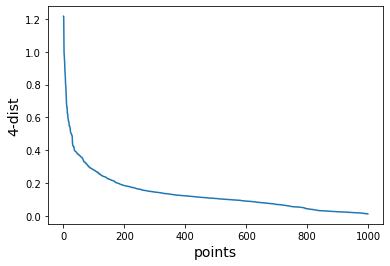



non-spherical


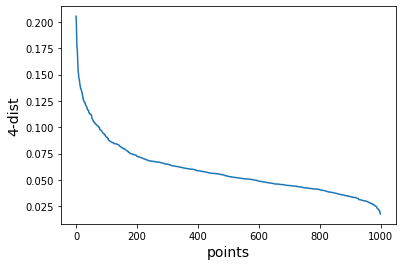



many-clusters


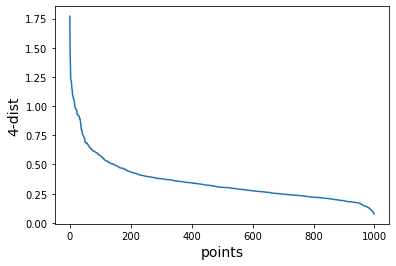



diff-sizes


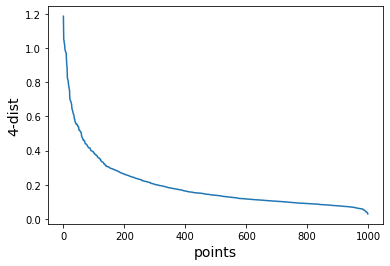



diff-densitites


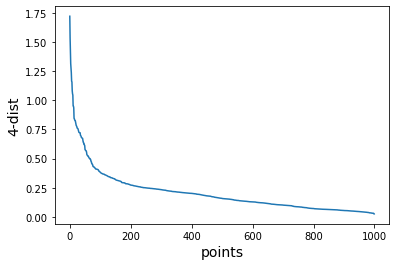



kmeans-fail


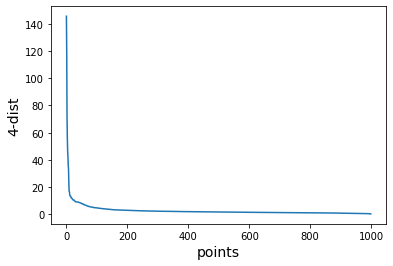

In [15]:
for key in data_dict.keys():
  print(key)
  k_dist(data_dict[key][0], 4)
  print('\n')

Derived best values for eps with min_samples=4
- non-clusters: 0.3
- non-spherical: 0.1
- many-clusters: 0.5 
- diff-sizes: 0.3 
- diff-densities: 0.3 
- k-means-fail: 5

In [0]:
data_dict = {'non-cluster':[X1, labels_true1, 0.3],'non-spherical':[X2, labels_true2, 0.1],'many-clusters':[X3, labels_true3, 0.5],
             'diff-sizes':[X4, labels_true4, 0.3],'diff-densitites':[X5, labels_true5, 0.3],'kmeans-fail':[X6, labels_true6, 5]}

## A. Recommended eps and min_samples, euclidean metric, no data scaling

In [0]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
def plot_dbscan(dbscan, truelabels, inputdata):
  core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
  core_samples_mask[dbscan.core_sample_indices_] = True
  labels = dbscan.labels_
  print('dbscan labels', np.unique(labels))
  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
  unique_labels = set(labels)
  # entropy
  n_points = len(labels)
  entropy = 0
  label_counts = Counter(labels)
  for label in unique_labels:
    content_list = [labels[pos] for pos, cont in enumerate(truelabels) if cont == label]
    content_counts = Counter(content_list)
    label_entropy = -sum([content_counts[content] / label_counts[label] * np.log2(
        content_counts[content] / label_counts[label]) for content in content_counts])
    entropy += label_entropy * (label_counts[label] / n_points)
  print('Estimated number of clusters: %d' % n_clusters_)
  print('Estimated number of noise points: %d' % n_noise_)
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(truelabels, labels))
  print("Completeness: %0.3f" % metrics.completeness_score(truelabels, labels))
  print("V-measure: %0.3f" % metrics.v_measure_score(truelabels, labels))
  print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(truelabels, labels))
  print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(truelabels, labels))
  if len(unique_labels)>1:
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(inputdata, labels))
  else:
    print('DBSCAN clustered data into one cluster wihtout any noise.\nCalculation of silhouette score requires at least two different labeling (i.e. [-1,0])')
  print("Overall Entropy: %0.3f" % entropy)
  print("Compactness (Mean Squared Error): %0.3f" % metrics.mean_squared_error(truelabels, labels))
  # Black removed and is used for noise instead.
  colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):
      if k == -1:
          # Black used for noise.
          col = [0, 0, 0, 1]

      class_member_mask = (labels == k)

      xy = inputdata[class_member_mask & core_samples_mask]
      plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
              markeredgecolor='k', markersize=14)

      xy = inputdata[class_member_mask & ~core_samples_mask]
      plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
              markeredgecolor='k', markersize=6)

  plt.title('Estimated number of clusters: %d' % n_clusters_, fontsize=15)
  plt.show()
  return None

Data non-cluster
dbscan labels [-1  0  1  2]
Estimated number of clusters: 3
Estimated number of noise points: 43
Homogeneity: 0.013
Completeness: 0.038
V-measure: 0.020
Adjusted Rand Index: 0.001
Adjusted Mutual Information: 0.011
Silhouette Coefficient: 0.259
Overall Entropy: -2.280
Compactness (Mean Squared Error): 0.590


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


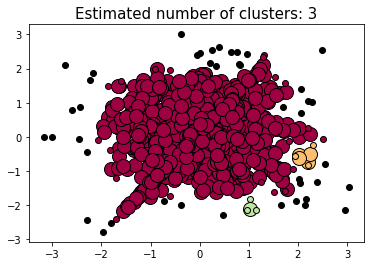



Data non-spherical
dbscan labels [-1  0  1]
Estimated number of clusters: 2
Estimated number of noise points: 15
Homogeneity: 0.967
Completeness: 0.882
V-measure: 0.923
Adjusted Rand Index: 0.962
Adjusted Mutual Information: 0.881
Silhouette Coefficient: 0.230
Overall Entropy: 0.108
Compactness (Mean Squared Error): 0.032


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


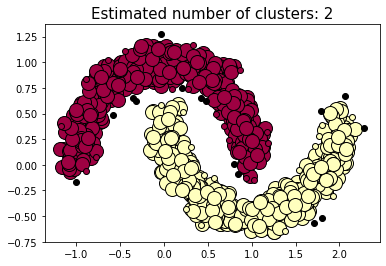



Data many-clusters
dbscan labels [-1  0  1  2  3  4]
Estimated number of clusters: 5
Estimated number of noise points: 56
Homogeneity: 0.373
Completeness: 0.716
V-measure: 0.491
Adjusted Rand Index: 0.315
Adjusted Mutual Information: 0.369
Silhouette Coefficient: 0.034
Overall Entropy: -1.928
Compactness (Mean Squared Error): 7.678


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


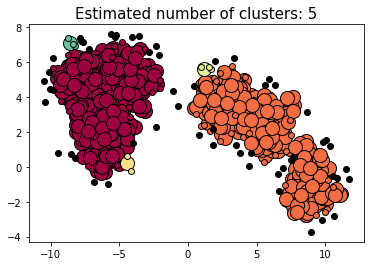



Data diff-sizes
dbscan labels [-1  0  1  2  3  4  5  6  7  8  9]
Estimated number of clusters: 10
Estimated number of noise points: 78
Homogeneity: 0.878
Completeness: 0.641
V-measure: 0.741
Adjusted Rand Index: 0.877
Adjusted Mutual Information: 0.638
Silhouette Coefficient: 0.126
Overall Entropy: -0.769
Compactness (Mean Squared Error): 1.950


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


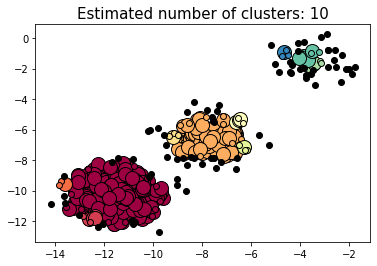



Data diff-densitites
dbscan labels [-1  0  1  2  3  4  5  6]
Estimated number of clusters: 7
Estimated number of noise points: 95
Homogeneity: 0.943
Completeness: 0.734
V-measure: 0.825
Adjusted Rand Index: 0.840
Adjusted Mutual Information: 0.732
Silhouette Coefficient: 0.465
Overall Entropy: -1.339
Compactness (Mean Squared Error): 5.779


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


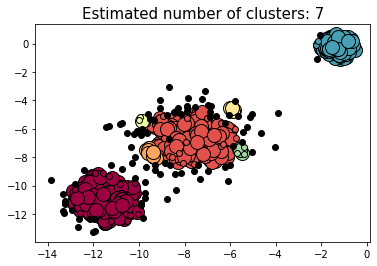



Data kmeans-fail
dbscan labels [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Estimated number of clusters: 17
Estimated number of noise points: 34
Homogeneity: 0.547
Completeness: 0.402
V-measure: 0.463
Adjusted Rand Index: 0.376
Adjusted Mutual Information: 0.394
Silhouette Coefficient: 0.108
Overall Entropy: -1.908
Compactness (Mean Squared Error): 13.523


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


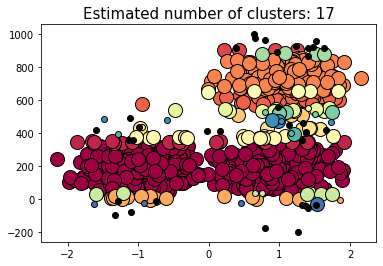

In [18]:
for key in data_dict.keys():
  print('Data', key)
  elem = data_dict[key]
  db = DBSCAN(eps=elem[2], min_samples=4, metric='euclidean').fit(elem[0])
  plot_dbscan(db, elem[1], elem[0])
  print('\n')

## B. Same eps and min_samples, euclidean metric, data scaling

Data non-cluster
dbscan labels [-1  0  1  2  3]
Estimated number of clusters: 4
Estimated number of noise points: 55
Homogeneity: 0.016
Completeness: 0.035
V-measure: 0.022
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.013
Silhouette Coefficient: 0.020
Overall Entropy: -2.193
Compactness (Mean Squared Error): 0.648


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


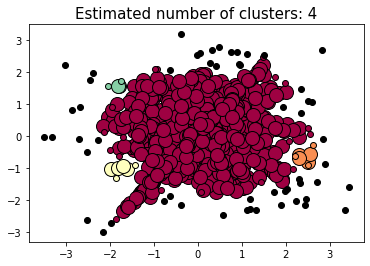



Data non-spherical
dbscan labels [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Estimated number of clusters: 14
Estimated number of noise points: 80
Homogeneity: 0.920
Completeness: 0.351
V-measure: 0.508
Adjusted Rand Index: 0.456
Adjusted Mutual Information: 0.348
Silhouette Coefficient: -0.192
Overall Entropy: 1.055
Compactness (Mean Squared Error): 7.034


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


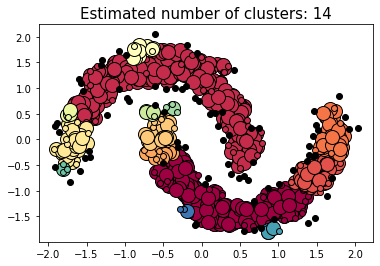



Data many-clusters
dbscan labels [0]
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
DBSCAN clustered data into one cluster wihtout any noise.
Calculation of silhouette score requires at least two different labeling (i.e. [-1,0])
Overall Entropy: 0.431
Compactness (Mean Squared Error): 9.144


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


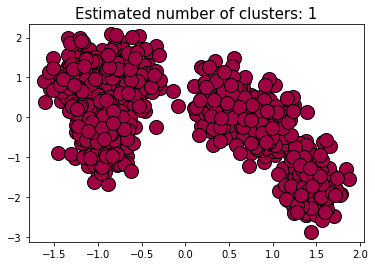



Data diff-sizes
dbscan labels [-1  0  1  2]
Estimated number of clusters: 3
Estimated number of noise points: 6
Homogeneity: 0.991
Completeness: 0.956
V-measure: 0.973
Adjusted Rand Index: 0.994
Adjusted Mutual Information: 0.955
Silhouette Coefficient: 0.720
Overall Entropy: 0.037
Compactness (Mean Squared Error): 0.031


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


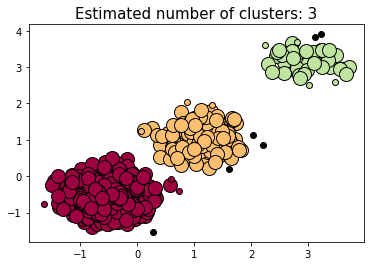



Data diff-densitites
dbscan labels [0 1]
Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 0.580
Completeness: 1.000
V-measure: 0.734
Adjusted Rand Index: 0.572
Adjusted Mutual Information: 0.579
Silhouette Coefficient: 0.749
Overall Entropy: 0.334
Compactness (Mean Squared Error): 0.667


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


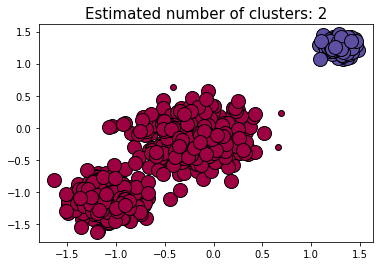



Data kmeans-fail
dbscan labels [0]
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
DBSCAN clustered data into one cluster wihtout any noise.
Calculation of silhouette score requires at least two different labeling (i.e. [-1,0])
Overall Entropy: 0.528
Compactness (Mean Squared Error): 1.665


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


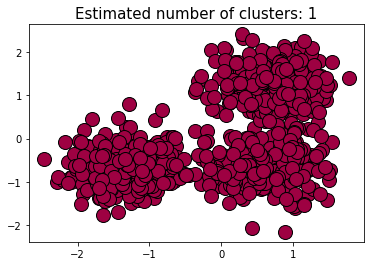

In [19]:
for key in data_dict.keys():
  print('Data', key)
  elem = data_dict[key]
  X = StandardScaler().fit_transform(elem[0])
  db = DBSCAN(eps=elem[2], min_samples=4, metric='euclidean').fit(X)
  plot_dbscan(db, elem[1], X)
  print('\n')

## C. Same values for eps and min_samples, two other metrics and no data scaling
The metric is used to calculate the distance between instances in a feature array: sklearn pairwise distance

__Manhattan distance measure__

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Data non-cluster
dbscan labels [-1  0  1  2  3]
Estimated number of clusters: 4
Estimated number of noise points: 66
Homogeneity: 0.015
Completeness: 0.033
V-measure: 0.021
Adjusted Rand Index: 0.003
Adjusted Mutual Information: 0.012
Silhouette Coefficient: -0.010
Overall Entropy: -2.587
Compactness (Mean Squared Error): 0.676


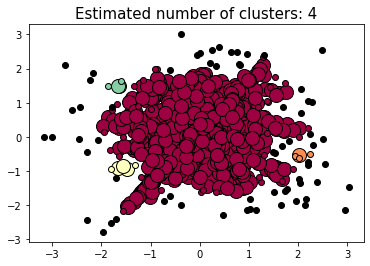



Data non-spherical
dbscan labels [-1  0  1  2  3]
Estimated number of clusters: 4
Estimated number of noise points: 44
Homogeneity: 0.941
Completeness: 0.741
V-measure: 0.829
Adjusted Rand Index: 0.895
Adjusted Mutual Information: 0.741
Silhouette Coefficient: -0.191
Overall Entropy: 0.254
Compactness (Mean Squared Error): 0.106


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


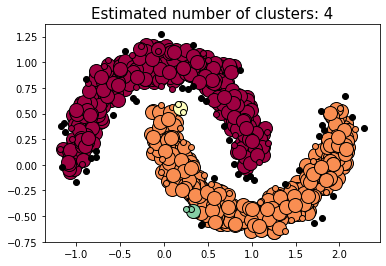



Data many-clusters
dbscan labels [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Estimated number of clusters: 14
Estimated number of noise points: 107
Homogeneity: 0.602
Completeness: 0.634
V-measure: 0.618
Adjusted Rand Index: 0.444
Adjusted Mutual Information: 0.593
Silhouette Coefficient: -0.060
Overall Entropy: -0.762
Compactness (Mean Squared Error): 10.379


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


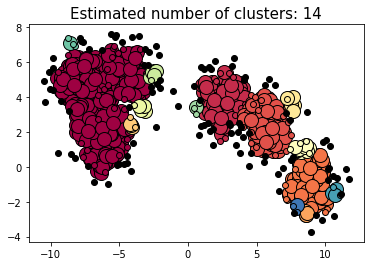



Data diff-sizes
dbscan labels [-1  0  1  2  3  4  5  6  7  8  9 10]
Estimated number of clusters: 11
Estimated number of noise points: 126
Homogeneity: 0.799
Completeness: 0.516
V-measure: 0.627
Adjusted Rand Index: 0.755
Adjusted Mutual Information: 0.511
Silhouette Coefficient: -0.093
Overall Entropy: -0.415
Compactness (Mean Squared Error): 4.142


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


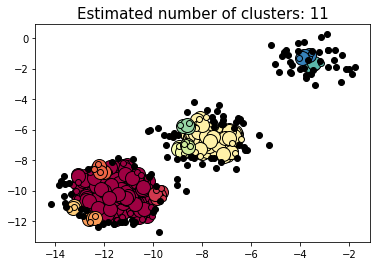



Data diff-densitites
dbscan labels [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Estimated number of clusters: 17
Estimated number of noise points: 133
Homogeneity: 0.923
Completeness: 0.569
V-measure: 0.704
Adjusted Rand Index: 0.708
Adjusted Mutual Information: 0.564
Silhouette Coefficient: 0.224
Overall Entropy: -2.572
Compactness (Mean Squared Error): 74.155


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


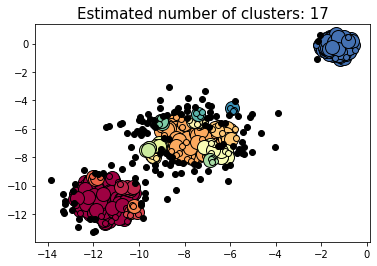



Data kmeans-fail
dbscan labels [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Estimated number of clusters: 17
Estimated number of noise points: 51
Homogeneity: 0.544
Completeness: 0.392
V-measure: 0.456
Adjusted Rand Index: 0.369
Adjusted Mutual Information: 0.385
Silhouette Coefficient: 0.108
Overall Entropy: -1.862
Compactness (Mean Squared Error): 15.232


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


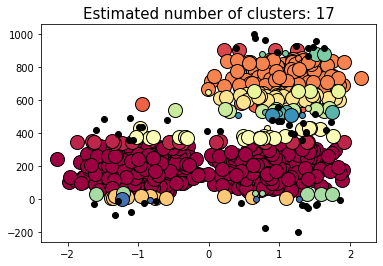

In [20]:
for key in data_dict.keys():
  print('Data', key)
  elem = data_dict[key]
  db = DBSCAN(eps=elem[2], min_samples=4, metric='manhattan').fit(elem[0])
  plot_dbscan(db, elem[1], elem[0])
  print('\n')

__Cosine distance measure__

Data non-cluster
dbscan labels [0]
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
DBSCAN clustered data into one cluster wihtout any noise.
Calculation of silhouette score requires at least two different labeling (i.e. [-1,0])
Overall Entropy: 0.500
Compactness (Mean Squared Error): 0.500


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


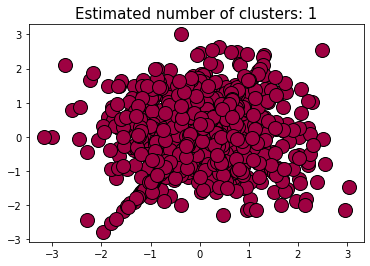



Data non-spherical
dbscan labels [-1  0]
Estimated number of clusters: 1
Estimated number of noise points: 1
Homogeneity: 0.001
Completeness: 0.088
V-measure: 0.002
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Silhouette Coefficient: -0.157
Overall Entropy: 0.499
Compactness (Mean Squared Error): 0.503


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


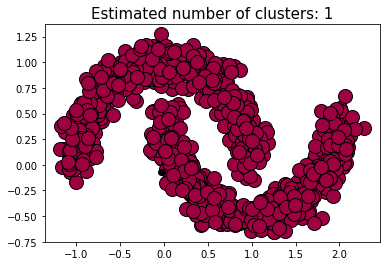



Data many-clusters
dbscan labels [0]
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
DBSCAN clustered data into one cluster wihtout any noise.
Calculation of silhouette score requires at least two different labeling (i.e. [-1,0])
Overall Entropy: 0.431
Compactness (Mean Squared Error): 9.144


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


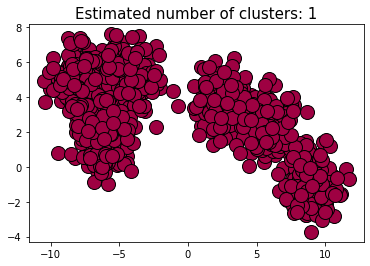



Data diff-sizes
dbscan labels [0]
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: -0.000
Completeness: 1.000
V-measure: -0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
DBSCAN clustered data into one cluster wihtout any noise.
Calculation of silhouette score requires at least two different labeling (i.e. [-1,0])
Overall Entropy: 0.311
Compactness (Mean Squared Error): 0.400


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


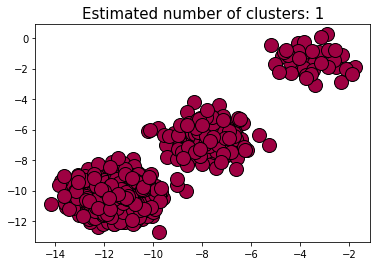



Data diff-densitites
dbscan labels [0]
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
DBSCAN clustered data into one cluster wihtout any noise.
Calculation of silhouette score requires at least two different labeling (i.e. [-1,0])
Overall Entropy: 0.528
Compactness (Mean Squared Error): 1.669


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


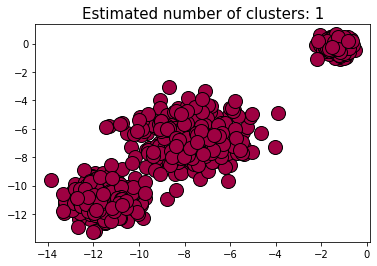



Data kmeans-fail
dbscan labels [0]
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
DBSCAN clustered data into one cluster wihtout any noise.
Calculation of silhouette score requires at least two different labeling (i.e. [-1,0])
Overall Entropy: 0.528
Compactness (Mean Squared Error): 1.665


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


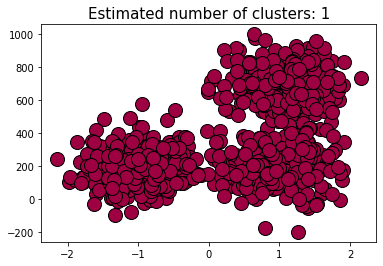

In [21]:
for key in data_dict.keys():
  print('Data', key)
  elem = data_dict[key]
  db = DBSCAN(eps=elem[2], min_samples=4, metric='cosine').fit(elem[0])
  plot_dbscan(db, elem[1], elem[0])
  print('\n')

## D. Same values for eps and min_samples, two other metrics and data scaling

__Manhattan distance measure__

Data non-cluster
dbscan labels [-1  0  1  2  3  4  5]
Estimated number of clusters: 6
Estimated number of noise points: 80
Homogeneity: 0.035
Completeness: 0.049
V-measure: 0.041
Adjusted Rand Index: 0.008
Adjusted Mutual Information: 0.030
Silhouette Coefficient: -0.067
Overall Entropy: -1.490
Compactness (Mean Squared Error): 0.841


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


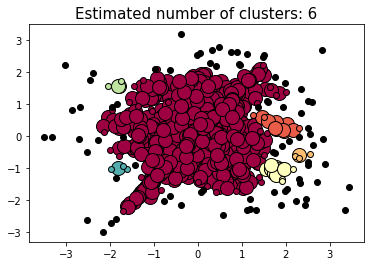



Data non-spherical
dbscan labels [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Estimated number of clusters: 44
Estimated number of noise points: 188
Homogeneity: 0.813
Completeness: 0.179
V-measure: 0.294
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.173
Silhouette Coefficient: -0.001
Overall Entropy: 0.396
Compactness (Mean Squared Error): 186.475


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


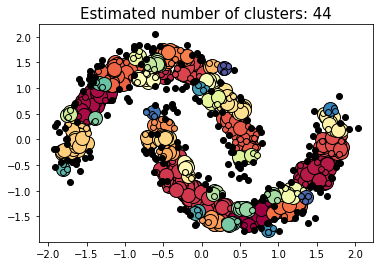



Data many-clusters
dbscan labels [0]
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
DBSCAN clustered data into one cluster wihtout any noise.
Calculation of silhouette score requires at least two different labeling (i.e. [-1,0])
Overall Entropy: 0.431
Compactness (Mean Squared Error): 9.144


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


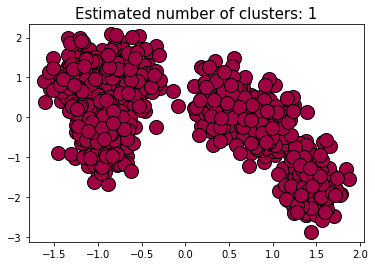



Data diff-sizes
dbscan labels [-1  0  1  2]
Estimated number of clusters: 3
Estimated number of noise points: 15
Homogeneity: 0.976
Completeness: 0.910
V-measure: 0.942
Adjusted Rand Index: 0.982
Adjusted Mutual Information: 0.909
Silhouette Coefficient: 0.709
Overall Entropy: 0.074
Compactness (Mean Squared Error): 0.078


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


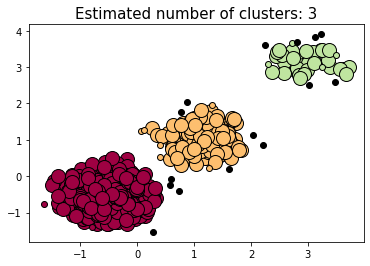



Data diff-densitites
dbscan labels [-1  0  1]
Estimated number of clusters: 2
Estimated number of noise points: 2
Homogeneity: 0.580
Completeness: 0.979
V-measure: 0.728
Adjusted Rand Index: 0.571
Adjusted Mutual Information: 0.579
Silhouette Coefficient: 0.526
Overall Entropy: 0.353
Compactness (Mean Squared Error): 0.671


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


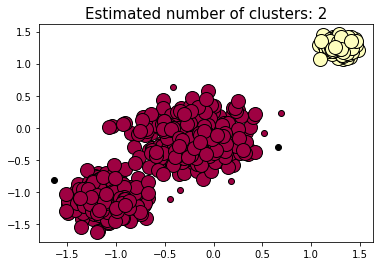



Data kmeans-fail
dbscan labels [0]
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
DBSCAN clustered data into one cluster wihtout any noise.
Calculation of silhouette score requires at least two different labeling (i.e. [-1,0])
Overall Entropy: 0.528
Compactness (Mean Squared Error): 1.665


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


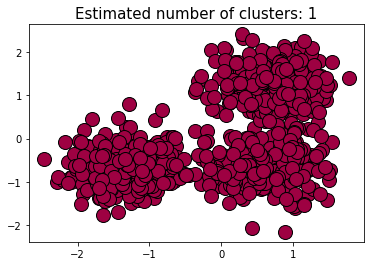

In [22]:
for key in data_dict.keys():
  print('Data', key)
  elem = data_dict[key]
  X = StandardScaler().fit_transform(elem[0])
  db = DBSCAN(eps=elem[2], min_samples=4, metric='manhattan').fit(X)
  plot_dbscan(db, elem[1], X)
  print('\n')

__Cosine distance measure__

Data non-cluster
dbscan labels [0]
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
DBSCAN clustered data into one cluster wihtout any noise.
Calculation of silhouette score requires at least two different labeling (i.e. [-1,0])
Overall Entropy: 0.500
Compactness (Mean Squared Error): 0.500


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


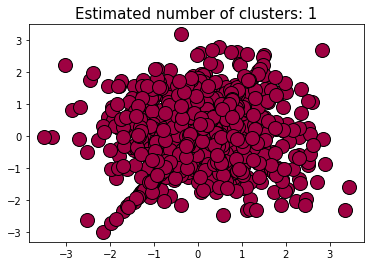



Data non-spherical
dbscan labels [0]
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
DBSCAN clustered data into one cluster wihtout any noise.
Calculation of silhouette score requires at least two different labeling (i.e. [-1,0])
Overall Entropy: 0.500
Compactness (Mean Squared Error): 0.500


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


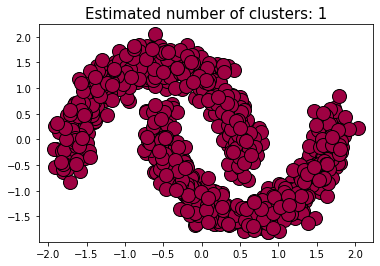



Data many-clusters
dbscan labels [0]
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
DBSCAN clustered data into one cluster wihtout any noise.
Calculation of silhouette score requires at least two different labeling (i.e. [-1,0])
Overall Entropy: 0.431
Compactness (Mean Squared Error): 9.144


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


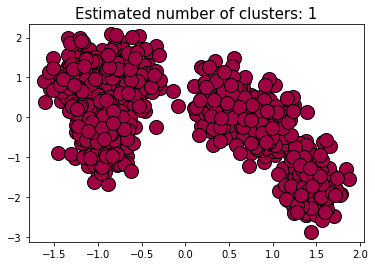



Data diff-sizes
dbscan labels [0]
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: -0.000
Completeness: 1.000
V-measure: -0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
DBSCAN clustered data into one cluster wihtout any noise.
Calculation of silhouette score requires at least two different labeling (i.e. [-1,0])
Overall Entropy: 0.311
Compactness (Mean Squared Error): 0.400


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


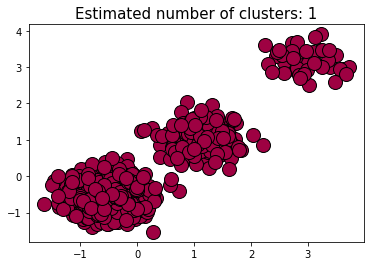



Data diff-densitites
dbscan labels [0]
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
DBSCAN clustered data into one cluster wihtout any noise.
Calculation of silhouette score requires at least two different labeling (i.e. [-1,0])
Overall Entropy: 0.528
Compactness (Mean Squared Error): 1.669


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


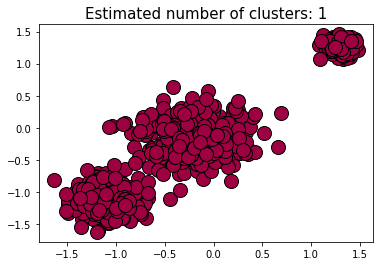



Data kmeans-fail
dbscan labels [0]
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
DBSCAN clustered data into one cluster wihtout any noise.
Calculation of silhouette score requires at least two different labeling (i.e. [-1,0])
Overall Entropy: 0.528
Compactness (Mean Squared Error): 1.665


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


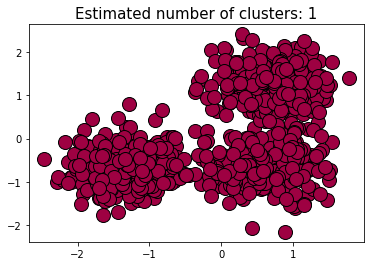

In [23]:
for key in data_dict.keys():
  print('Data', key)
  elem = data_dict[key]
  X = StandardScaler().fit_transform(elem[0])
  db = DBSCAN(eps=elem[2], min_samples=4, metric='cosine').fit(X)
  plot_dbscan(db, elem[1], X)
  print('\n')

## E. Bad setting for eps and min_samples, such that the wrong number of clusters is found, euclidian metric and data scaling. 

Data non-cluster
dbscan labels [-1  0  1  2  3]
Estimated number of clusters: 4
Estimated number of noise points: 838
Homogeneity: 0.082
Completeness: 0.094
V-measure: 0.088
Adjusted Rand Index: 0.040
Adjusted Mutual Information: 0.080
Silhouette Coefficient: -0.337
Overall Entropy: -2.610
Compactness (Mean Squared Error): 2.508


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


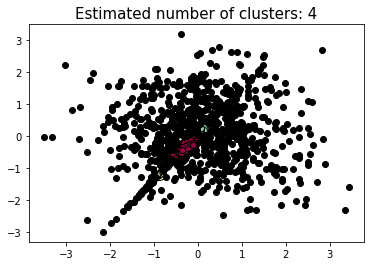



Data non-spherical
dbscan labels [-1]
Estimated number of clusters: 0
Estimated number of noise points: 1000
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
DBSCAN clustered data into one cluster wihtout any noise.
Calculation of silhouette score requires at least two different labeling (i.e. [-1,0])
Overall Entropy: 0.000
Compactness (Mean Squared Error): 2.500


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


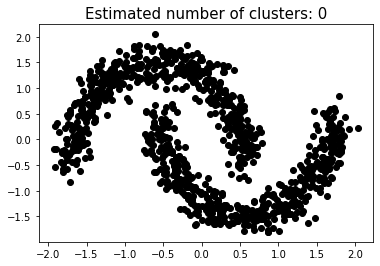



Data many-clusters
dbscan labels

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


 [-1  0]
Estimated number of clusters: 1
Estimated number of noise points: 965
Homogeneity: 0.037
Completeness: 0.436
V-measure: 0.068
Adjusted Rand Index: 0.005
Adjusted Mutual Information: 0.036
Silhouette Coefficient: -0.082
Overall Entropy: -0.376
Compactness (Mean Squared Error): 14.751


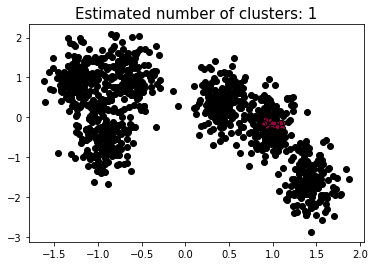



Data diff-sizes
dbscan labels [-1  0]
Estimated number of clusters: 1
Estimated number of noise points: 529
Homogeneity: 0.286
Completeness: 0.284
V-measure: 0.285
Adjusted Rand Index: 0.154
Adjusted Mutual Information: 0.283
Silhouette Coefficient: 0.240
Overall Entropy: 0.211
Compactness (Mean Squared Error): 1.529


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


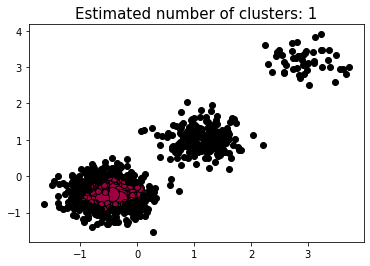



Data diff-densitites
dbscan labels [-1  0  1  2  3]
Estimated number of clusters: 4
Estimated number of noise points: 266
Homogeneity: 0.873
Completeness: 0.689
V-measure: 0.770
Adjusted Rand Index: 0.741
Adjusted Mutual Information: 0.688
Silhouette Coefficient: 0.442
Overall Entropy: -1.306
Compactness (Mean Squared Error): 1.268


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


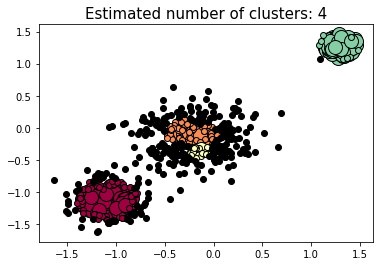



Data kmeans-fail
dbscan labels [-1  0]
Estimated number of clusters: 1
Estimated number of noise points: 980
Homogeneity: 0.020
Completeness: 0.229
V-measure: 0.037
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.019
Silhouette Coefficient: -0.165
Overall Entropy: -1.357
Compactness (Mean Squared Error): 4.563


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


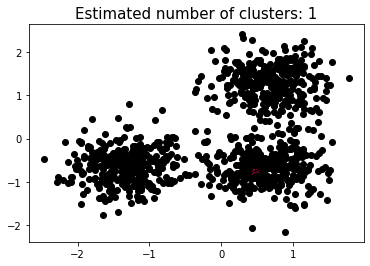

In [24]:
for key in data_dict.keys():
  print('Data', key)
  elem = data_dict[key]
  X = StandardScaler().fit_transform(elem[0])
  db = DBSCAN(eps=0.1, min_samples=20, metric='euclidean').fit(X)
  plot_dbscan(db, elem[1], X)
  print('\n')

## F. Real world data set, recommended eps and min_samples

__no data scaling__

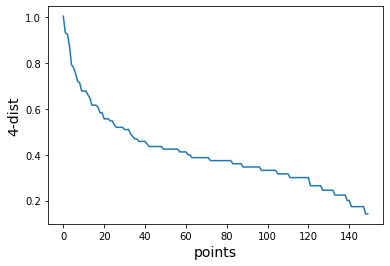

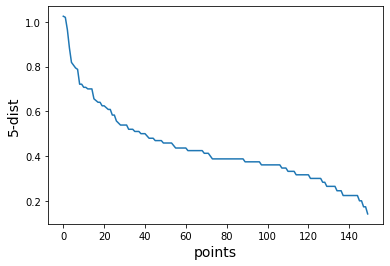

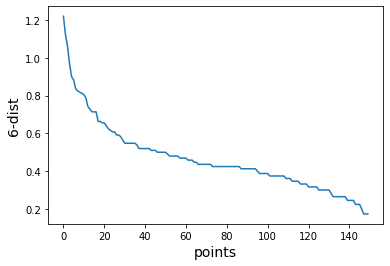

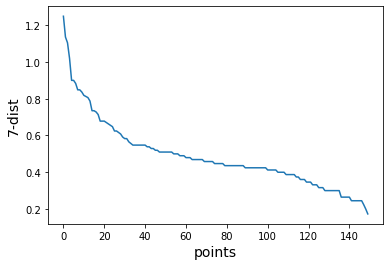

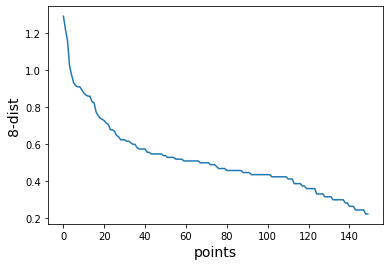

In [25]:
data = load_iris()
for k in [4,5,6,7,8]:
  k_dist(data.data,k)

dbscan labels [-1  0  1  2]
Estimated number of clusters: 3
Estimated number of noise points: 13
Homogeneity: 0.593
Completeness: 0.652
V-measure: 0.621
Adjusted Rand Index: 0.526
Adjusted Mutual Information: 0.585
Silhouette Coefficient: 0.381
Overall Entropy: -0.474
Compactness (Mean Squared Error): 0.953


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


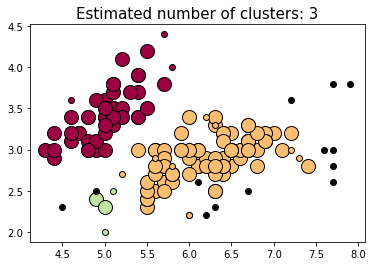

In [26]:
db = DBSCAN(eps=0.5, min_samples=4, metric='euclidean').fit(data.data)
plot_dbscan(db, data.target, data.data)

__with data scaling__

dbscan labels [-1  0  1]
Estimated number of clusters: 2
Estimated number of noise points: 33
Homogeneity: 0.504
Completeness: 0.529
V-measure: 0.516
Adjusted Rand Index: 0.447
Adjusted Mutual Information: 0.498
Silhouette Coefficient: 0.365
Overall Entropy: 0.522
Compactness (Mean Squared Error): 1.593


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


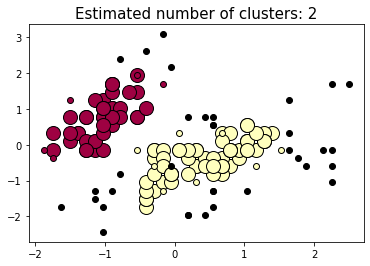

In [27]:
X = StandardScaler().fit_transform(data.data)
db = DBSCAN(eps=0.5, min_samples=4, metric='euclidean').fit(X)
plot_dbscan(db, data.target, X)

# Extend the data

## 3D

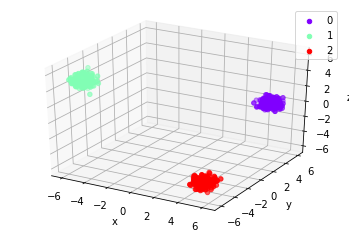

In [28]:
centers = [[5, 5, 0], [-5, -5, 5], [5, -5, -5]]
X7, labels_true7= make_blobs(n_samples=750, centers=centers, cluster_std=0.4)
df = DataFrame(dict(x=X7[:,0], y=X7[:,1], z=X7[:,2], label=labels_true7))
grouped = df.groupby('label')
colors = cm.rainbow(np.linspace(0, 1, 3))
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for key, group in grouped:
    ax.scatter(xs=group.x, ys=group.y, zs=group.z, label=key, c=[colors[key]])
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## 4D

In [0]:
centers = [[5, 5, 0, 0], [-5, -5, 5, 5], [5, -5, -5, -5]]
X8, labels_true8= make_blobs(n_samples=750, centers=centers, cluster_std=0.4)

## 5D

In [0]:
centers = [[5, 5, 0, 0, 0], [-5, -5, 5, 5, 5], [5, -5, -5 , -5, -5]]
X9, labels_true9= make_blobs(n_samples=750, centers=centers, cluster_std=0.4)

# Unsupervised learning: self-organizing maps


## Train four individual SOMs

In [31]:
!pip install -q minisom

In [0]:
from minisom import MiniSom    
import matplotlib.gridspec as gridspec

In [0]:
#function from the minisom examples: https://github.com/JustGlowing/minisom/blob/master/examples/Classification.ipynb
def classify(som, data, class_assignments):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = class_assignments
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

def train_som(inputdata, gridsize, dim, lbls):
  som = MiniSom(gridsize, gridsize, dim, sigma=3, learning_rate=0.5)
  som.pca_weights_init(inputdata)

  print("Training...")
  som.train_random(inputdata, 100, verbose=True) # trains the SOM with 100 iterations
  print("\n...ready!")

  print('Evaluation')
  print('Labels Map')
  # number of samples froma  given label that have been mapped into a position (i,j)
  labels_map = som.labels_map(inputdata,lbls)
  label_names = np.unique(lbls)

  # Quantization error between average difference between an input sample and its best matching unit
  q_err = som.quantization_error(inputdata)
  # for each input sample find best-matching and second best matching neuron in the map
  # if these two nodes are not adjacent => error
  # topographic error = total number of errors divided by total of samples
  # 0 means no errors, 1 means topography was not preserved for any of the input samples
  topo_err = som.topographic_error(inputdata)


  # apply different scoring metrics.
  labels = classify(som, inputdata, labels_map)
  unique_labels = set(labels)
  n_clusters_ = len(unique_labels)
  n_points = len(labels)
  entropy = 0
  label_counts = Counter(labels)
  for label in unique_labels:
    content_list = [labels[pos] for pos, cont in enumerate(lbls) if cont == label]
    content_counts = Counter(content_list)
    label_entropy = -sum([content_counts[content] / label_counts[label] * np.log2(
        content_counts[content] / label_counts[label]) for content in content_counts])
    entropy += label_entropy * (label_counts[label] / n_points)

  print('SOM labels', unique_labels)
  if n_clusters_>1:
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(inputdata, labels))
  else:
    print('SOM clustered data into one cluster.\nCalculation of silhouette score requires at least two different labels')
  print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(lbls, labels))
  print("Overall Entropy: %0.3f" % entropy)
  print("Compactness (Mean Squared Error): %0.3f" % metrics.mean_squared_error(lbls, labels))
  print('Number of clusters: %d' % n_clusters_)

  print('Cluster Visualisation 1')
  plt.figure(figsize=(7, 7))
  # Plotting the response for each pattern in the iris dataset
  plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
  #plt.colorbar()
  markers = ['o', 's', 'D']
  colors = cm.rainbow(np.linspace(0, 1, 3))
  for cnt, xx in enumerate(inputdata):
      w = som.winner(xx)  # getting the winner
      # palce a marker on the winning position for the sample xx
      plt.plot(w[0]+.5, w[1]+.5, markers[lbls[cnt]], markerfacecolor='None', 
              markeredgecolor=colors[lbls[cnt]], markersize=12, markeredgewidth=2, label=lbls[cnt])
  plt.axis([0, gridsize, 0, gridsize])
  #plt.savefig('resulting_images/som_iris.png')
  plt.show()
  

  print('Cluster Visualisation 2')
  pyplot.figure(figsize=(7, 7))
  the_grid = gridspec.GridSpec(gridsize, gridsize)
  for position in labels_map.keys():
      label_fracs = [labels_map[position][l] for l in label_names]
      plt.subplot(the_grid[(gridsize-1)-position[1], position[0]], aspect=1)
      patches, texts = plt.pie(label_fracs)
  pyplot.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)
  pyplot.show()


  print('U-Matrix')
  pyplot.pcolor(som.distance_map().T, cmap='viridis_r')
  pyplot.show()
  return None

### 2D

Training...
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.2974400075150337
 topographic error: 0.747

...ready!
Evaluation
Labels Map
SOM labels {0, 1}
Silhouette Coefficient: 0.338
Adjusted Rand Index: 0.960
Overall Entropy: 0.075
Compactness (Mean Squared Error): 0.010
Number of clusters: 2
Cluster Visualisation 1


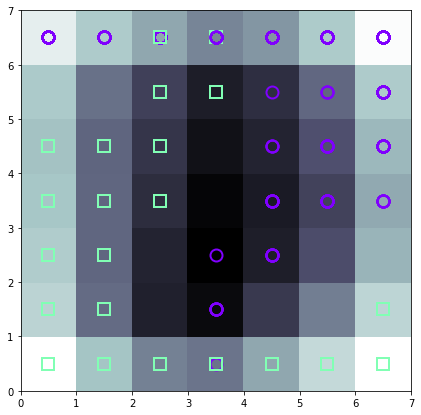

Cluster Visualisation 2


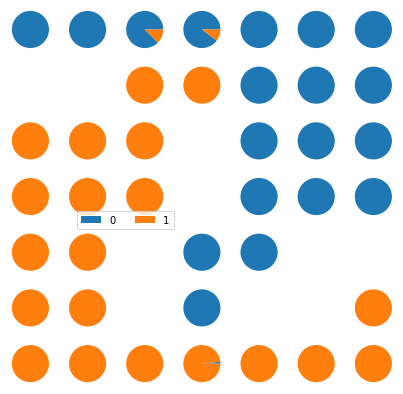

U-Matrix


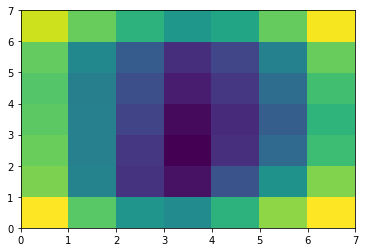

In [34]:
train_som(X2, 7, 2, labels_true2)

### 3D

Training...
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.6610962026194163
 topographic error: 0.04933333333333333

...ready!
Evaluation
Labels Map
SOM labels {0, 1, 2}
Silhouette Coefficient: 0.926
Adjusted Rand Index: 1.000
Overall Entropy: 0.000
Compactness (Mean Squared Error): 0.000
Number of clusters: 3
Cluster Visualisation 1


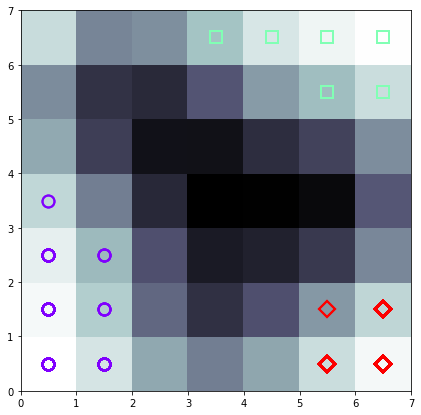

Cluster Visualisation 2


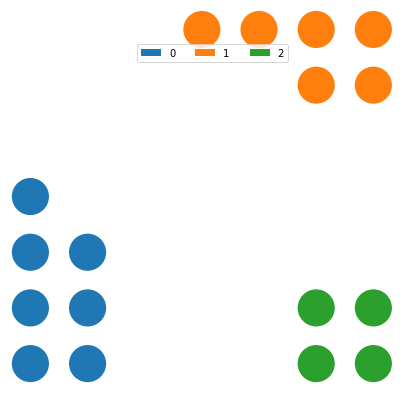

U-Matrix


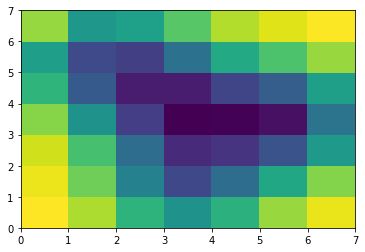

In [35]:
train_som(X7, 7, 3, labels_true7)

### 4D

Training...
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.8106556014821248
 topographic error: 0.41733333333333333

...ready!
Evaluation
Labels Map
SOM labels {0, 1, 2}
Silhouette Coefficient: 0.920
Adjusted Rand Index: 1.000
Overall Entropy: 0.000
Compactness (Mean Squared Error): 0.000
Number of clusters: 3
Cluster Visualisation 1


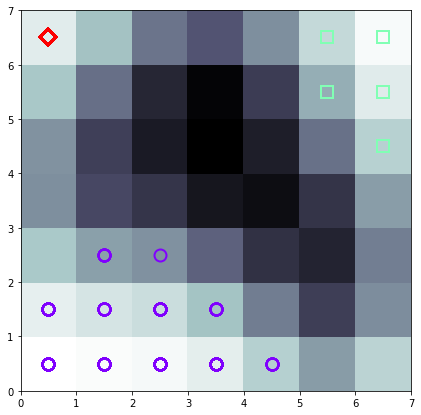

Cluster Visualisation 2


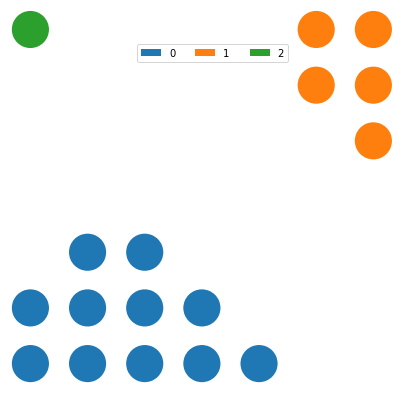

U-Matrix


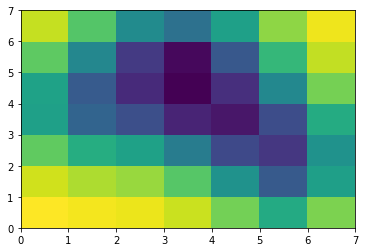

In [36]:
train_som(X8, 7, 4, labels_true8)

### 5D

Training...
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.8500173463905075
 topographic error: 0.1

...ready!
Evaluation
Labels Map
SOM labels {0, 1, 2}
Silhouette Coefficient: 0.915
Adjusted Rand Index: 1.000
Overall Entropy: 0.000
Compactness (Mean Squared Error): 0.000
Number of clusters: 3
Cluster Visualisation 1


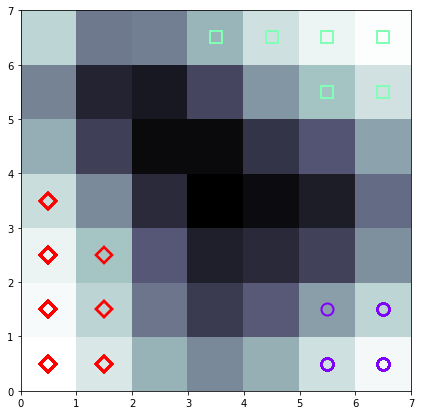

Cluster Visualisation 2


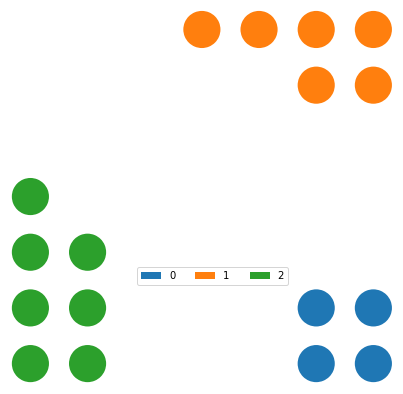

U-Matrix


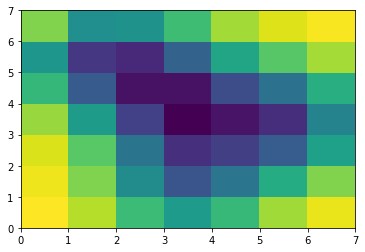

In [37]:
train_som(X9, 7, 5, labels_true9)

## Try out different topologies for 3D data set

Training...
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.5319798593458822
 topographic error: 0.8493333333333334

...ready!
Evaluation
Labels Map
SOM labels {0, 1, 2}
Silhouette Coefficient: 0.926
Adjusted Rand Index: 1.000
Overall Entropy: 0.000
Compactness (Mean Squared Error): 0.000
Number of clusters: 3
Cluster Visualisation 1


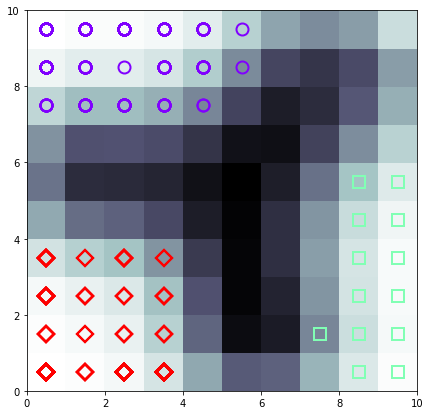

Cluster Visualisation 2


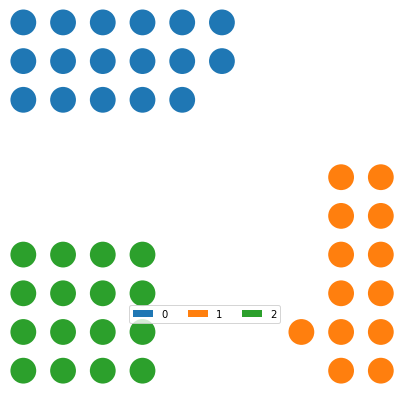

U-Matrix


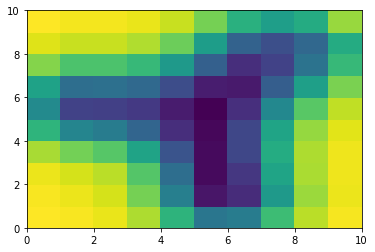

In [38]:
train_som(X7, 10, 3, labels_true7)

Training...
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.4375311321201819
 topographic error: 0.952

...ready!
Evaluation
Labels Map
SOM labels {0, 1, 2}
Silhouette Coefficient: 0.926
Adjusted Rand Index: 1.000
Overall Entropy: 0.000
Compactness (Mean Squared Error): 0.000
Number of clusters: 3
Cluster Visualisation 1


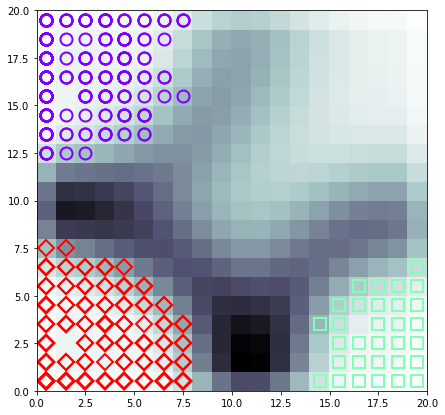

Cluster Visualisation 2


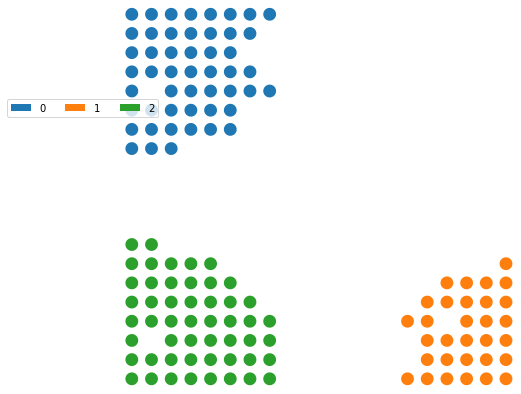

U-Matrix


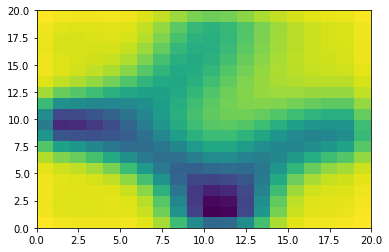

In [39]:
train_som(X7, 20, 3, labels_true7)

Training...

/usr/local/lib/python3.6/dist-packages/minisom.py:140: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')



 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 5.954210220911275
 topographic error: 0.032

...ready!
Evaluation
Labels Map
SOM labels {0, 1, 2}
Silhouette Coefficient: 0.926
Adjusted Rand Index: 1.000
Overall Entropy: 0.000
Compactness (Mean Squared Error): 0.000
Number of clusters: 3
Cluster Visualisation 1


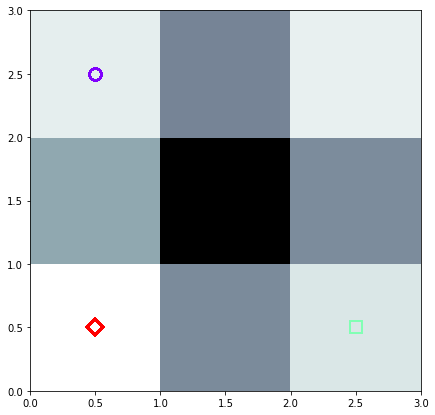

Cluster Visualisation 2


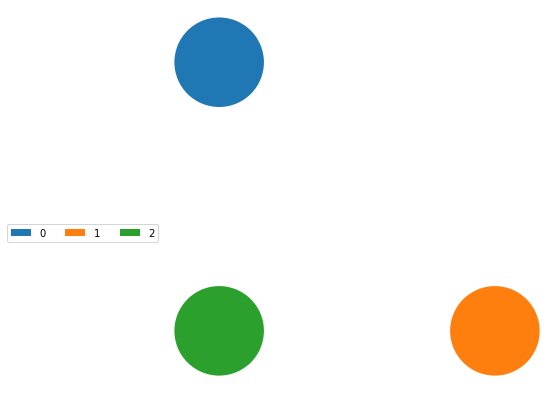

U-Matrix


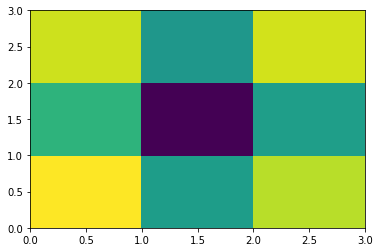

In [40]:
train_som(X7, 3, 3, labels_true7)

## Train SOM on real world data

Training...
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.7394774606935356
 topographic error: 0.5

...ready!
Evaluation
Labels Map
SOM labels {0, 1, 2}
Silhouette Coefficient: 0.513
Adjusted Rand Index: 0.731
Overall Entropy: 0.302
Compactness (Mean Squared Error): 0.107
Number of clusters: 3
Cluster Visualisation 1


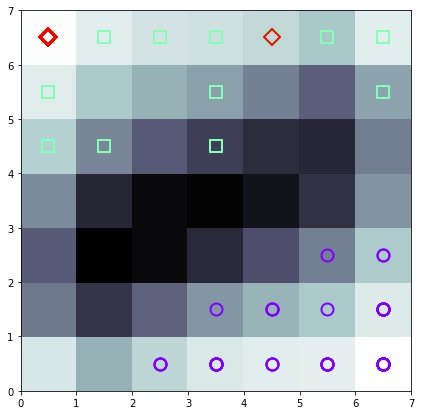

Cluster Visualisation 2


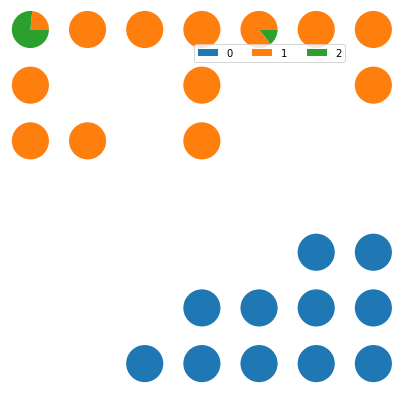

U-Matrix


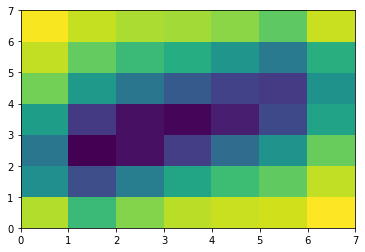

In [41]:
train_som(data.data, 7, 4, data.target)

In [42]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')